<a href="https://colab.research.google.com/github/ProfKlein/github.io/blob/main/IRGA_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Colab notebook for inter-country comparison**

## Introduction

We will use **Python** and its **pandas** library to compare GDP, exports and imports of countries. We will show the results of our calculations on a world map.

## Python basics

## Importing Python libraries for data science

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing data on GDP per capita from the IMF's World Economic Outlook (WEO)

In [ ]:
dtype_dict = {str(c) : np.float64 for c in range(1980, 2030)}
gdp = pd.read_csv("https://magentacloud.de/s/K8PweNCbcxzzJJ6/download/weo_gdp.csv", dtype=dtype_dict, index_col="ISO")
gdp.columns = [int(c) if c.isdigit() else c for c in gdp.columns]

The Python variable "gdp" contains the data on real GDP per capita for all countries in the WEO. How many countries are there? We can check this with Python's "len" function (len = "length"):

In [ ]:
len(gdp)

196

The type of the variable "gdp" can be found out with the Python function "type":

In [ ]:
# type(gdp)

In short, we can call "gdp" a pandas dataframe. Effectively it looks like an Excel table, with rows and columns of data.

In [ ]:
gdp

,WEO Country Code,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,1981,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,Estimates Start After
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,512,NGDPRPPPPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",NaN,NaN,...,1945.371,1793.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0
ALB,914,NGDPRPPPPC,Albania,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",5557.555,5757.844,...,14639.597,15383.880,15935.294,16476.659,17090.905,17750.321,18431.571,19144.767,19889.199,2021.0
DZA,612,NGDPRPPPPC,Algeria,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",10218.263,10207.634,...,12281.106,12524.602,12854.883,13162.677,13391.670,13557.343,13679.396,13802.240,13927.054,2019.0
AND,171,NGDPRPPPPC,Andorra,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",NaN,NaN,...,52819.990,56415.783,55317.396,55218.640,54957.623,54697.840,54439.286,54181.953,53925.837,2022.0
AGO,614,NGDPRPPPPC,Angola,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",3496.048,3254.269,...,5906.891,5880.912,5736.462,5711.848,5718.959,5740.869,5768.622,5800.329,5835.771,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,582,NGDPRPPPPC,Vietnam,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",1437.143,1489.395,...,10515.404,11260.399,11729.785,12353.923,13053.171,13797.168,14587.790,15427.197,16314.905,2022.0
WBG,487,NGDPRPPPPC,West Bank and Gaza,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",NaN,NaN,...,5312.497,5397.771,4953.437,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
YEM,474,NGDPRPPPPC,Yemen,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",NaN,NaN,...,1727.547,1717.606,1646.271,1594.345,1582.714,1657.252,1727.764,1793.654,1853.931,2022.0


## Importing population data from the IMF's World Economic Outlook (WEO)

In [ ]:
dtype_dict = {str(c) : np.float64 for c in range(1980, 2030)}
pop = pd.read_csv("https://magentacloud.de/s/Ds7A5fP8cJ53jqz/download/weo_pop.csv", dtype=dtype_dict, index_col="ISO")
pop.columns = [int(c) if c.isdigit() else c for c in pop.columns]

"pop", similar to "gdp", is a pandas Dataframe.

In [ ]:
pop

,WEO Country Code,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,1981,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,Estimates Start After
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,512,LP,Afghanistan,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,NaN,NaN,...,33.698,34.263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0
ALB,914,LP,Albania,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office. INSTAT Lat...,2.672,2.726,...,2.873,2.866,2.858,2.850,2.840,2.831,2.821,2.810,2.799,2021.0
DZA,612,LP,Algeria,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,18.666,19.246,...,44.577,45.291,45.973,46.626,47.251,47.851,48.425,49.006,49.594,2019.0
AND,171,LP,Andorra,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,NaN,NaN,...,0.080,0.082,0.085,0.087,0.089,0.090,0.092,0.094,0.096,2023.0
AGO,614,LP,Angola,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,8.272,8.495,...,34.504,35.711,36.783,37.886,39.023,40.194,41.399,42.641,43.921,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,582,LP,Vietnam,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,54.180,55.310,...,98.506,99.462,100.300,100.770,101.571,102.340,103.085,103.812,104.544,2022.0
WBG,487,LP,West Bank and Gaza,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,NaN,NaN,...,5.227,5.355,5.477,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
YEM,474,LP,Yemen,Population,"For census purposes, the total population of t...",Persons,Millions,"Source: United Nations, Department of Economic...",NaN,NaN,...,32.641,33.322,34.071,34.829,35.611,36.390,37.174,37.957,38.742,2022.0


"gdp" and "pop" have the same format. Same number of rows and same number of columns. The difference is that "gdp" contains the data on real GDP per capita while "pop" contains the data on population.

## Evolution of real GDP per capita (in PPP dollars), 1990 - 2023

Define the year range, using Python's built-in range function

In [ ]:
years = range(1990, 2024)

Use panda's "loc" method to get WEO GDP data for a list of countries during the chosen years.

loc[rows, columns] takes two arguments: a list of row names and a list of column names. It is added to the name of the dataframe with a connecting dot "."

<Axes: >

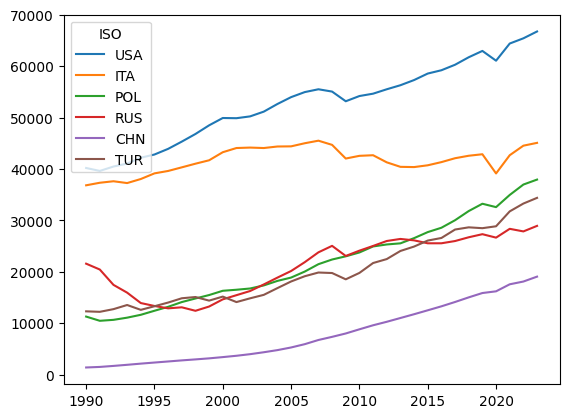

In [ ]:
gdp.loc[["USA", "ITA", "POL", "RUS", "CHN", "TUR"], years].T.plot()

## Comparing the economic size of countries (total GDP)

So far we have compared countries' real GDP **per capita**. To compare their **total** (i.e. national) GDP, we multiply GDP per capita by each country's population.

We do this in one operation by multiplying the dataframe gdp with the dataframe pop. We just have to make sure that we select only those columns of the dataframes that contain the relevant numbers, i.e. without the columns containing the descriptive (textual) information. In order to accomplish this, we again use pandas' "loc" method, selecting all rows but only the columns for the years.

In [ ]:
total_gdp = gdp.loc[:, years] * pop.loc[:, years]

Now we can make a diagram comparing countries' total GDP.

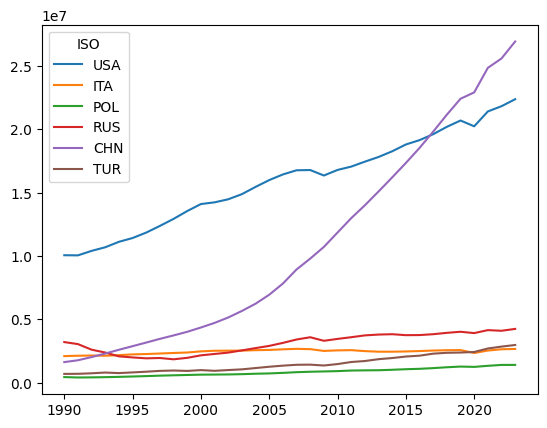

In [ ]:
p = total_gdp.loc[["USA", "ITA", "POL", "RUS", "CHN", "TUR"]].T.plot()
# p.set_yscale("log")

## Maps

In [ ]:
import geopandas as gpd

In [ ]:
Path().home()

PosixPath('/root')

In [ ]:
ne_110 = gpd.read_file(Path.home() / "MagentaCLOUD" / "GeoData" / "NaturalEarth" / "ne_110m_admin_0_countries" / "ne_110m_admin_0_countries.shp")
# cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
ne_10 = gpd.read_file(Path.home() / "MagentaCLOUD" / "GeoData" / "NaturalEarth" / "ne_10m_admin_0_countries" / "ne_10m_admin_0_countries.shp")


DataSourceError: /root/MagentaCLOUD/GeoData/NaturalEarth/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp: No such file or directory

In [ ]:
    def __init__(self, dataframe, geocode: str = "ADM0_A3_FR"):
        super().__init__()
        self.df = dataframe
        self.geocode = geocode
        self.gdf = natural_earth
        self.data = self.gdf.merge(self.df, left_on=self.geocode, right_on=self.df.index.name)
        self.main_continents = {'Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania'}


In [ ]:
ne_10.merge(gdp, left_on= "ADM0_A3_FR", right_on=self.df.index.name)